In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import datetime as dt 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# Old Strategy

import scipy.stats as st
import numpy as np
import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive('True')
'exec(%matplotlib inline)'
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from forex_python.converter import get_rate
from datetime import datetime, date 
import time 

# Basic data collection functions
def getPrice(ticker, start='2013-08-07', end='2019-10-17'):
    df = dr.data.get_data_yahoo(ticker, start, end)
    df.info()
    return df['Adj Close']

def logRet(df):
    # Plots daily returns
    pri = df
    daily_returns = pri * 0
    for i in range(1, len(pri)):
        daily_returns[i] = np.log(pri[i]/pri[i-1])
    return daily_returns

# For a portfolio's returns, gives the index
def indx(ret):
    ind = ret * 0
    ind += 100
    for i in range(1, len(ret)):
        ind[i] = ind[i-1] * (1+ret[i])
    return ind

# Cumulative returns

def cumRet(rets):
    cumR = rets * 0 
    for t in range(1, len(cumR)):
        cumR[t] = cumR[t-1] + rets[t]
    return cumR

def plotCumRet(cumR):
    fig = plt.figure()
    ax = fig.add_axes([1,1,1,1])
    ax.plot(cumR)
    ax.set_xlabel('Month')
    ax.set_ylabel('% Return')
    ax.set_title('Cumulative Return')
    plt.show()

def plotCumRets(rets):
    c = cumRet(rets)
    plotCumRet(c)

# Risk metric functions

def maxDrawdown(pri, window=252):
    Roll_Max = pri.rolling(window, min_periods=200).max()
    Daily_Drawdown = pri/Roll_Max - 1.0
    Daily_Drawdown *= -1
    Max_Daily_Drawdown = np.max(Daily_Drawdown)
    print("Max daily drawdown: {}%".format(round(Max_Daily_Drawdown, 2)))
    return Max_Daily_Drawdown

def plotDrawdown(pri, window=252):
    Roll_Max = pri.rolling(window, min_periods=200).max()
    Daily_Drawdown = pri/Roll_Max - 1.0
    Daily_Drawdown *= -1
    fig = plt.figure()
    ax = fig.add_axes([1,1,1,1])
    ax.plot(Daily_Drawdown)
    ax.set_xlabel('Year')
    ax.set_ylabel('%')
    ax.set_title('Drawdown')
    plt.show()

def valueAR(dailyRet, per): #Historical
    pci = np.percentile(dailyRet, per)
    print("VaR at {0}%: {1}%".format(per, round(-100*pci, 3)))
    return pci

def cVAR(dailyRet, per):
    pci = np.percentile(dailyRet, per)
    sumBad = 0
    t = 0
    for i in range(1, len(dailyRet)):
        if dailyRet[i] <= pci:
            t += 1
            sumBad += dailyRet[i]
    if t > 0:
        condVaR = sumBad / t
    else:
        condVaR = 0
    print("CVaR at {0}%: {1}%".format(per, round(-100*condVaR, 3)))
    return condVaR

def semiv(dayRet, port=False):
    m = np.mean(dayRet)
    low = []
    for i in range(1, len(dayRet)):
        if dayRet[i] <= m:
            low.append(dayRet[i])
    stand = np.std(low)
    if port: 
        stand *= np.sqrt(21)
    print("SemiSD: {}".format(round(stand, 6)))
    return stand

# Use pricing data
def max_drawdown(X):
    mdd = 0
    peak = X[0]
    for i in range(1, len(X)):
        if X[i] > peak:
            peak = X[i]
        dd = (peak - X[i]) / peak
        if dd > mdd:
            mdd = dd
    return mdd

# SD, SemiV, Drawdown, VaR, CVaR, Skewness, Kurtosis
def riskMetrics(ret, name = "portfolio", varP = 5, cvarP = 5, port=False):
    print("Risk metrics for {}".format(name))
    pri = indx(ret)
    print("Average return: {}%".format(round(100*np.mean(ret), 6)))
    sd = np.std(ret)
    if port: 
        print("SD: {}".format(np.round(sd*np.sqrt(21), 6)))
    else: 
        print("SD: {}".format(np.round(sd, 6)))
    semiv(ret, port=port)
    dd = max_drawdown(pri)
    print("Max DD: {}%".format(round(100*dd, 2)))
    valueAR(ret, varP)
    cVAR(ret, cvarP)
    sk = st.skew(ret)
    print("Skewness: {}".format(round(sk, 6)))
    kurt = st.kurtosis(ret)
    print("Kurtosis: {}".format(round(kurt+3, 6)))
    print("Excess Kurtosis: {}".format(round(kurt, 6)))
    print("")
    
def cVARNP(dailyRet, per):
    pci = np.percentile(dailyRet, per)
    sumBad = 0
    t = 0
    for i in range(1, len(dailyRet)):
        if dailyRet[i] <= pci:
            t += 1
            sumBad += dailyRet[i]
    if t > 0:
        condVaR = sumBad / t
    else:
        condVaR = 0
    print("CVaR at {0}%: {1}%".format(per, np.round(float(-100*condVaR), 3)))
    return condVaR

def riskMetricsNP(ret, name = "portfolio", varP = 5, cvarP = 5, port=False):
    print("Risk metrics for {}".format(name))
    pri = indx(ret)
    print("Average return: {}%".format(round(100*np.mean(ret), 6)))
    sd = np.std(ret)
    # Note change for monthly to work for portfolio 
    if port: 
        print("SD: {}".format(np.round(sd*np.sqrt(21), 6)))
    else: 
        print("SD: {}".format(np.round(sd, 6)))
    semiv(ret, port=port)
    dd = max_drawdown(pri)
    print("Max DD: {}%".format(np.round(float(100*dd), 2)))
    valueAR(ret, varP)
    cVARNP(ret, cvarP)
    sk = st.skew(ret)
    print("Skewness: {}".format(np.round(float(sk), 6)))
    kurt = st.kurtosis(ret)
    print("Kurtosis: {}".format(round(kurt+3, 6)))
    print("Excess Kurtosis: {}".format(np.round(float(kurt), 6)))
    print("")
    
def getCSVPrice(t, start='2018-1-1', end='2020-1-1'): 
    prices = dfP.loc[start : end, t].values
    return prices

def getCSVRet(t, start='2018-1-1', end='2020-1-1'): 
    rets = dfRet.loc[start : end, t].values
    return rets 

def strip_replace(x):
    return x.strip("'").strip('[').strip(']').strip().replace("'", "").split(', ')

def sameMonth(d): 
    ld = d.index.max()
    lm = ld.month
    ly = ld.year
    td = date.today()
    tm = td.month
    ty = td.year
    if (lm, ly) != (tm, ty): 
        print('Not the same')
        error
    return 0

/Users/Chris/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
getPrice('ACWI', '1960-01-01', dt.date.today()).reset_index()
getPrice('PSP', '1960-01-01', dt.date.today()).reset_index()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3075 entries, 2008-03-28 to 2020-06-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3075 non-null   float64
 1   Low        3075 non-null   float64
 2   Open       3075 non-null   float64
 3   Close      3075 non-null   float64
 4   Volume     3075 non-null   float64
 5   Adj Close  3075 non-null   float64
dtypes: float64(6)
memory usage: 168.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3432 entries, 2006-10-24 to 2020-06-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3432 non-null   float64
 1   Low        3432 non-null   float64
 2   Open       3432 non-null   float64
 3   Close      3432 non-null   float64
 4   Volume     3432 non-null   float64
 5   Adj Close  3432 non-null   float64
dtypes: float64(6)
memory usage: 187.7 KB


,Date,Adj Close
0,2006-10-24,10.885585
1,2006-10-25,10.954970
2,2006-10-26,11.102430
3,2006-10-27,11.024364
4,2006-10-30,11.098093
...,...,...
3427,2020-06-08,10.970000
3428,2020-06-09,10.750000
3429,2020-06-10,10.620000
3430,2020-06-11,9.970000


In [4]:
etfs = ['ACWI','GWX','PICB','BWX','BWZ','WIP','PCY','BCI','DBA','DBE','GSG','GLD',
       'VNQ','IFEU','RWO','SUSA','PSP']
etfP = getPrice(etfs[0], '1960-01-01', dt.date.today()).reset_index()
etfP['Date'] = pd.to_datetime(etfP['Date'], format='%Y-%m-%d').sort_index()
for e in etfs[1:]:
    try: 
        df = getPrice(e, '1960-01-01', dt.date.today()).reset_index()
        df.columns = df.columns.str.replace('.L','')
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
        etfP = pd.merge(etfP, df, on='Date', how='outer')
    except: 
        print('\n\n\n\n',e,'\n\n\n\n')

etfs = ['ACWI','GWX','PICB','BWX','BWZ','WIP','PCY','BCI','DBA','DBE','GSG','GLD',
       'VNQ','IFEU','RWO','SUSA','PSP']
etfP.columns = ['Date'] + etfs
etfP = etfP.sort_index()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3075 entries, 2008-03-28 to 2020-06-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3075 non-null   float64
 1   Low        3075 non-null   float64
 2   Open       3075 non-null   float64
 3   Close      3075 non-null   float64
 4   Volume     3075 non-null   float64
 5   Adj Close  3075 non-null   float64
dtypes: float64(6)
memory usage: 168.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3307 entries, 2007-04-26 to 2020-06-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3307 non-null   float64
 1   Low        3307 non-null   float64
 2   Open       3307 non-null   float64
 3   Close      3307 non-null   float64
 4   Volume     3307 non-null   float64
 5   Adj Close  3307 non-null   float64
dtypes: float64(6)
memory usage: 180.9 KB
<class 'pandas.core.frame.Da

In [5]:
etfP

,Date,ACWI,GWX,PICB,BWX,BWZ,WIP,PCY,BCI,DBA,DBE,GSG,GLD,VNQ,IFEU,RWO,SUSA,PSP
0,2008-03-28,39.570621,19.847765,NaN,24.632395,NaN,45.812340,13.635712,NaN,35.939865,37.956356,59.259998,91.879997,36.983006,30.281708,NaN,45.512234,8.701890
1,2008-03-31,38.954552,20.098846,NaN,24.619644,NaN,45.878571,13.640968,NaN,34.840645,36.877029,57.860001,90.410004,37.125820,30.698339,NaN,45.826218,8.866337
2,2008-04-01,40.005043,20.475462,NaN,24.363785,NaN,45.164707,13.619949,NaN,35.079609,36.678211,56.880001,86.860001,39.238300,31.700684,NaN,47.247437,9.012508
3,2008-04-02,40.447342,20.305983,NaN,24.389330,NaN,45.142624,13.704020,NaN,36.264858,37.823811,58.490002,89.269997,39.047874,31.694643,NaN,47.181332,9.158683
4,2008-04-03,40.676392,20.324818,NaN,24.397840,NaN,45.216228,13.635712,NaN,36.522938,37.473503,58.459999,89.419998,39.940472,31.012333,NaN,47.313549,9.140408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,2004-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.879854,NaN,NaN,NaN,NaN
3950,2004-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.406136,NaN,NaN,NaN,NaN
3951,2004-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.753683,NaN,NaN,NaN,NaN
3952,2004-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.584862,NaN,NaN,NaN,NaN


In [6]:
etfR = np.log(etfP.set_index('Date') / etfP.set_index('Date').shift())
#etfR[abs(etfR) > .7] = 0
etfR = etfR.drop('BCI', axis=1)
etfR = etfR.sort_index()
etfR

,ACWI,GWX,PICB,BWX,BWZ,WIP,PCY,DBA,DBE,GSG,GLD,VNQ,IFEU,RWO,SUSA,PSP
Date,,,,,,,,,,,,,,,,
2004-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.406582,NaN,NaN,NaN,NaN
2004-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007992,NaN,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018338,NaN,NaN,NaN,NaN
2004-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004290,NaN,NaN,NaN,NaN
2004-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000195,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-08,0.011574,0.015563,0.009203,0.007331,0.005230,0.004551,0.008999,-0.000722,-0.016035,-0.012579,0.010764,0.024494,-0.001131,0.024175,0.011144,0.013768
2020-06-09,-0.008831,-0.013126,-0.004039,0.002779,0.001629,0.003399,-0.001868,0.000722,0.010718,0.001945,0.009596,-0.016731,-0.026676,-0.016745,-0.009315,-0.020259
2020-06-10,-0.002743,0.001737,0.006966,0.006913,0.004547,0.007700,0.002241,-0.004342,-0.002135,0.012554,0.014223,-0.025753,-0.009346,-0.025537,-0.002196,-0.012167


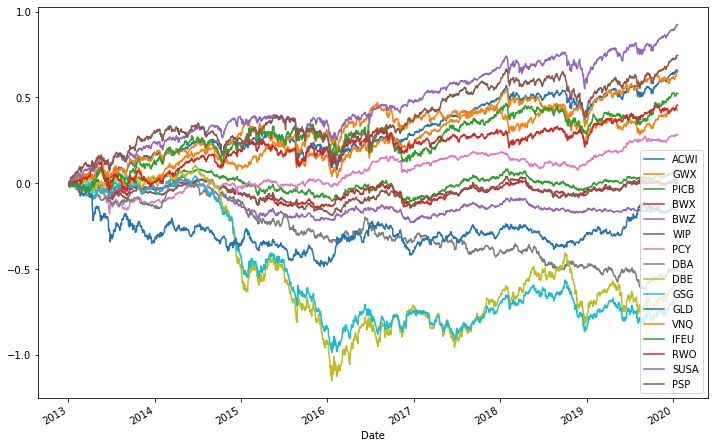

In [15]:
etfR.fillna(0).iloc[650:-100,:].cumsum().plot(figsize=(12,8))

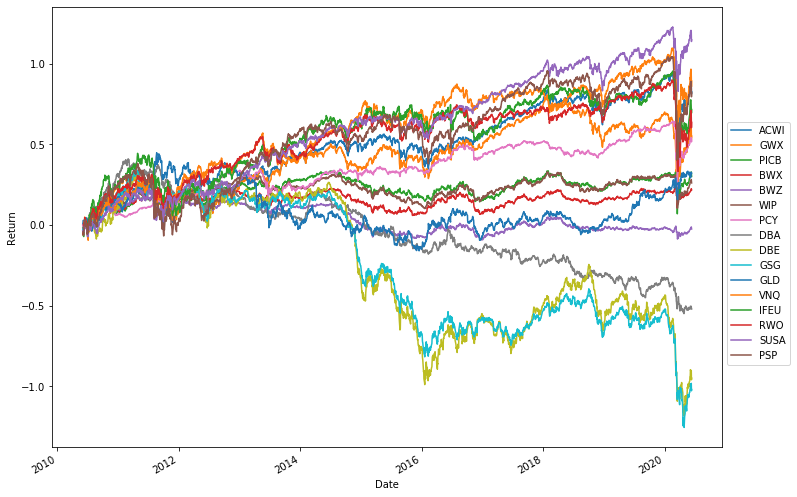

In [36]:
etfR.fillna(0).cumsum().plot(figsize=(12,9)).set_ylabel('Return')
plt.legend(bbox_to_anchor=(1,.75))
plt.savefig('etfR.png')

In [9]:
np.shape(etfR)[0], etfR.isna().sum()

(3954,
 ACWI     880
 GWX      648
 PICB    1430
 BWX      766
 BWZ     1093
 WIP      875
 PCY      766
 DBA      572
 DBE      572
 GSG      457
 GLD       37
 VNQ        1
 IFEU     819
 RWO      919
 SUSA      86
 PSP      524
 dtype: int64)

In [10]:
etfR = etfR.dropna()
etfR

,ACWI,GWX,PICB,BWX,BWZ,WIP,PCY,DBA,DBE,GSG,GLD,VNQ,IFEU,RWO,SUSA,PSP
Date,,,,,,,,,,,,,,,,
2010-06-04,-0.040041,-0.038338,-0.017721,0.000380,-0.003629,0.001164,-0.000776,-0.019752,-0.037901,-0.029940,0.010373,-0.058269,-0.053704,-0.051162,-0.034832,-0.042757
2010-06-07,-0.013887,-0.012396,0.001219,-0.006675,-0.004250,-0.007197,-0.007006,-0.008274,0.001734,-0.001484,0.019113,-0.005391,-0.012579,-0.007574,-0.009063,-0.021480
2010-06-08,0.015188,0.021278,0.002432,0.004392,0.002431,-0.004304,-0.004307,0.010872,0.002164,0.008133,-0.004041,0.017787,-0.002185,0.005604,0.005620,0.006013
2010-06-09,-0.003384,-0.003374,0.002830,0.003043,0.004844,0.005474,0.000784,-0.001298,0.012887,0.012441,-0.003643,0.005930,-0.003066,0.013064,-0.005187,-0.002401
2010-06-10,0.032579,0.034465,0.006439,0.003981,0.002413,0.009894,0.006643,0.009054,0.019024,0.021939,-0.013276,0.042375,0.049646,0.044113,0.029043,0.043511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-08,0.011574,0.015563,0.009203,0.007331,0.005230,0.004551,0.008999,-0.000722,-0.016035,-0.012579,0.010764,0.024494,-0.001131,0.024175,0.011144,0.013768
2020-06-09,-0.008831,-0.013126,-0.004039,0.002779,0.001629,0.003399,-0.001868,0.000722,0.010718,0.001945,0.009596,-0.016731,-0.026676,-0.016745,-0.009315,-0.020259
2020-06-10,-0.002743,0.001737,0.006966,0.006913,0.004547,0.007700,0.002241,-0.004342,-0.002135,0.012554,0.014223,-0.025753,-0.009346,-0.025537,-0.002196,-0.012167


In [11]:
etfR.to_csv('etfData.csv')
pd.read_csv('etfData.csv')

,Date,ACWI,GWX,PICB,BWX,BWZ,WIP,PCY,DBA,DBE,GSG,GLD,VNQ,IFEU,RWO,SUSA,PSP
0,2010-06-04,-0.040041,-0.038338,-0.017721,0.000380,-0.003629,0.001164,-0.000776,-0.019752,-0.037901,-0.029940,0.010373,-0.058269,-0.053704,-0.051162,-0.034832,-0.042757
1,2010-06-07,-0.013887,-0.012396,0.001219,-0.006675,-0.004250,-0.007197,-0.007006,-0.008274,0.001734,-0.001484,0.019113,-0.005391,-0.012579,-0.007574,-0.009063,-0.021480
2,2010-06-08,0.015188,0.021278,0.002432,0.004392,0.002431,-0.004304,-0.004307,0.010872,0.002164,0.008133,-0.004041,0.017787,-0.002185,0.005604,0.005620,0.006013
3,2010-06-09,-0.003384,-0.003374,0.002830,0.003043,0.004844,0.005474,0.000784,-0.001298,0.012887,0.012441,-0.003643,0.005930,-0.003066,0.013064,-0.005187,-0.002401
4,2010-06-10,0.032579,0.034465,0.006439,0.003981,0.002413,0.009894,0.006643,0.009054,0.019024,0.021939,-0.013276,0.042375,0.049646,0.044113,0.029043,0.043511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2020-06-08,0.011574,0.015563,0.009203,0.007331,0.005230,0.004551,0.008999,-0.000722,-0.016035,-0.012579,0.010764,0.024494,-0.001131,0.024175,0.011144,0.013768
2520,2020-06-09,-0.008831,-0.013126,-0.004039,0.002779,0.001629,0.003399,-0.001868,0.000722,0.010718,0.001945,0.009596,-0.016731,-0.026676,-0.016745,-0.009315,-0.020259
2521,2020-06-10,-0.002743,0.001737,0.006966,0.006913,0.004547,0.007700,0.002241,-0.004342,-0.002135,0.012554,0.014223,-0.025753,-0.009346,-0.025537,-0.002196,-0.012167
2522,2020-06-11,-0.057890,-0.057873,-0.015464,-0.003105,-0.008461,-0.010343,-0.024553,-0.013874,-0.054899,-0.046155,-0.007240,-0.066352,-0.045319,-0.064191,-0.057452,-0.063158


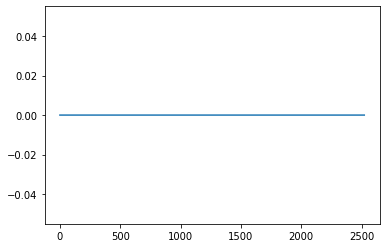

In [12]:
plt.plot(sorted(etfR.isna().sum(axis=1)))

In [ ]:
import p